## 🎯 Project Title: Admission Chance Prediction using Ridge Regression
**Objective:** Predict the chances of admission based on academic profile.


**1.Import Libararies**

In [145]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

**2.Load + Preprocess Dataset**

In [148]:
#Load CSV File
df_ACP = pd.read_csv("admission_predict.csv")
df_ACP.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [150]:
df_ACP.shape

(500, 9)

In [152]:
df_ACP.columns.to_list()

['Serial No.',
 'GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

In [154]:
#Check nulls values and data type
df_ACP.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [156]:
df_ACP.duplicated().sum()

0

In [158]:
df_ACP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [160]:
#Deop unnecessry colunm
df_ACP = df_ACP.drop(columns="Serial No.")

**EDA**

In [163]:

categorical=[] 
continous=[]
check=[]

d_types = dict(df_ACP.dtypes)
for name , type in d_types.items():
    if str(type) == 'object':
        categorical.append(name)
    elif str(type) == 'int64' or 'float':
        continous.append(name)
    else:
        check.append(name)

print("Categorical features:",categorical)
print("Continous features:",continous)
print("features to be checked:",check)

Categorical features: []
Continous features: ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']
features to be checked: []


In [165]:
df_ACP[continous].columns.to_list()

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

In [167]:
df_ACP.shape

(500, 8)

In [169]:
#satatics 
df_ACP[continous].describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [171]:
# Numeric columns select 
numeric_cols = df_ACP.select_dtypes(include='number').columns

# Mean and Std calculation
mean = df_ACP[numeric_cols].mean()
std = df_ACP[numeric_cols].std()

# Lower and upper limits for all columns 
lower_limits = mean - 3 * std
upper_limits = mean + 3 * std

# Display results
limits_df = pd.DataFrame({'Lower Limit': lower_limits, 'Upper Limit': upper_limits})
print(limits_df)


                   Lower Limit  Upper Limit
GRE Score           282.586555   350.357445
TOEFL Score          88.946397   125.437603
University Rating    -0.316535     6.544535
SOP                   0.400989     6.347011
LOR                   0.707651     6.260349
CGPA                  6.762002    10.390878
Research             -0.930652     2.050652
Chance of Admit       0.298319     1.145161


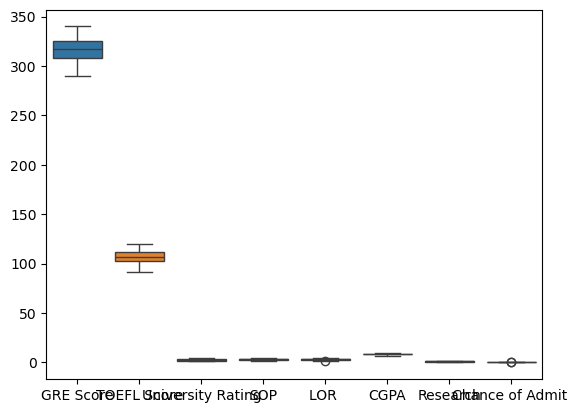

In [173]:
#Check Outliers
sns.boxplot(df_ACP)  
plt.show()

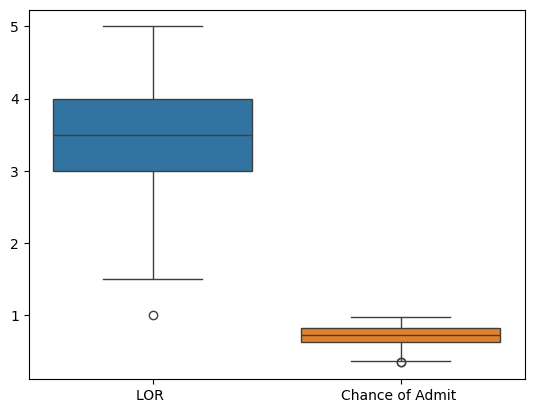

In [175]:
sns.boxplot(df_ACP[['LOR ','Chance of Admit ']])
plt.show()

In [177]:
#check skew
df_ACP.skew()       

GRE Score           -0.039842
TOEFL Score          0.095601
University Rating    0.090295
SOP                 -0.228972
LOR                 -0.145290
CGPA                -0.026613
Research            -0.242475
Chance of Admit     -0.289966
dtype: float64

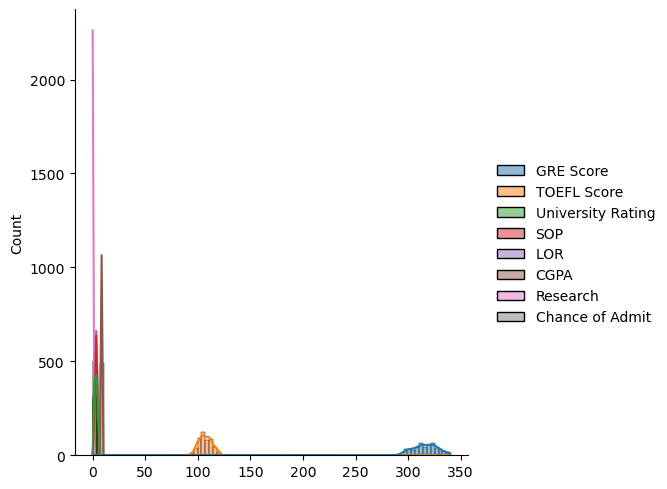

In [179]:
#Chek normal distribution
sns.displot(df_ACP,kde=True)
plt.show()

In [180]:
#check correlation
df_ACP.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


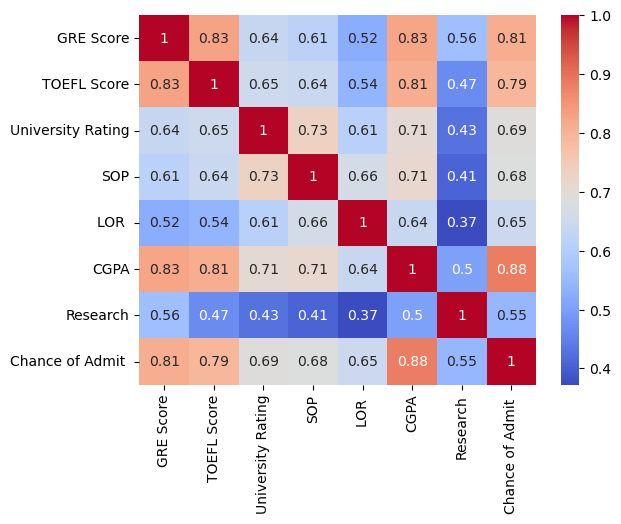

In [183]:
sns.heatmap(df_ACP.corr(), annot=True, cmap='coolwarm')
plt.show()  

**3NOTE:** ADD Synthetic Data

**4.Modeling Trainning(Rideg)**

In [256]:
#Train and split x ,y
X = df_ACP.drop('Chance of Admit ', axis=1)
y = df_ACP['Chance of Admit ']

#Trian
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)     

# Standard Scaling/fit         
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Ridge Regression/fit
ridge_best = Ridge()
ridge_best.fit(X_train,y_train)

#predictions
train_predications = ridge_best.predict(X_train)
test_predication = ridge_base.predict(X_test)

print("Train R2:", ridge_best.score(X_train,y_train))
print("Test R2:",ridge_best.score(X_test,y_test))

Train R2: 0.82101913817515
Test R2: 0.8179793486575073


In [240]:
#applying Hyperparameter tuning for ridge Regression

from sklearn.model_selection import GridSearchCV

#model
estimator = Ridge()

#parameters & values   
param_grid = {"alpha":[0.001,0.01,0.1,0.2,0.3,0.5,0.7,0.8,0.9,1,10,50,100,1000]}

#Identifying the best value of the parameter within given values for tha given data 
model_hp = GridSearchCV(estimator, param_grid, cv=5, scoring='neg_mean_squared_error')
model_hp.fit(X_train,y_train)
print(model_hp.best_params_)

{'alpha': 0.9}


In [250]:
#modeling 
ridge_best = Ridge(alpha=0.8) 
ridge_best.fit(X_train,y_train)

print("Intercept:",ridge_best.intercept_)
print("Coefficients:",ridge_best.coef_)

#predictiona
train_predictions = ridge_best.predict(X_train)
test_predictions = ridge_best.predict(X_test)

#Evaluation
print("\nTrain R2:",ridge_best.score(X_train,y_train))
print("Test R2:",ridge_best.score(X_test,y_test))

from sklearn.model_selection import cross_val_score 
print("\nCross Validation Score:", cross_val_score(ridge_best,X,y, cv=5).mean())

Intercept: -1.428401869689654
Coefficients: [0.00250447 0.00305763 0.00272814 0.00209582 0.01743169 0.10975098
 0.02374735]

Train R2: 0.8210360290758688
Test R2: 0.8181550386871682

Cross Validation Score: 0.8105126529557694


In [252]:
#final Test
inputs = [
    [330, 115, 4, 4, 4, 9.2, 1],
    [310, 100, 3, 3.5, 3, 8.0, 0],
    [295, 105, 2, 3.5, 2.5, 7.5, 0],
    [350, 125, 6, 6, 6, 10, 2]
]

predictions = ridge_best.predict(inputs)
print(predictions)


[0.87217872 0.59956868 0.51097033 1.10890379]


C:\Users\Chocolate\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [254]:
df_pred = pd.DataFrame(inputs, columns=['GRE', 'TOEFL', 'Rating', 'SOP', 'LOR', 'CGPA', 'Research'])
df_pred['Predicted Admit Chance'] = predictions
print(df_pred)


   GRE  TOEFL  Rating  SOP  LOR  CGPA  Research  Predicted Admit Chance
0  330    115       4  4.0  4.0   9.2         1                0.872179
1  310    100       3  3.5  3.0   8.0         0                0.599569
2  295    105       2  3.5  2.5   7.5         0                0.510970
3  350    125       6  6.0  6.0  10.0         2                1.108904


# Save a model for deployment

In [198]:
from joblib import dump
dump(ridge_best,'ridge_best.joblib')

['ridge_best.joblib']

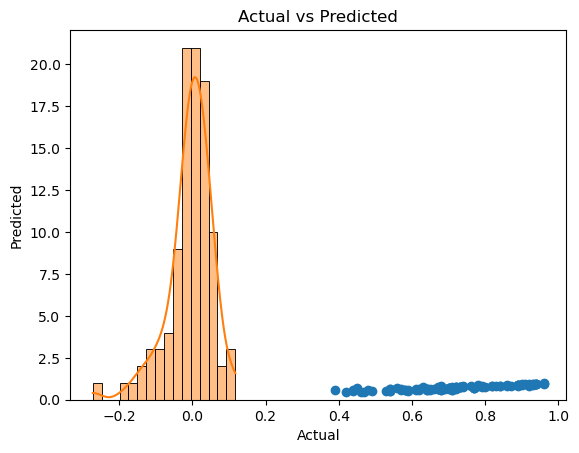

In [248]:
plt.scatter(y_test, test_predictions)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

residuals = y_test - test_predictions
sns.histplot(residuals, kde=True)
plt.show()

In [246]:
residuals.skew()#Normility error

-1.3114094286972742

## Feature Impact Analysis (Model Explainability)

In [205]:
#1.Permutation Importance
from sklearn.inspection import permutation_importance

result = permutation_importance(ridge_best, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean

for col, score in zip(X.columns, importances):
    print(f"{col}: {score}")
#less impact University and sop

GRE Score: 0.05579110613832983
TOEFL Score: 0.015668517682023896
University Rating: 0.0029659801954559197
SOP: 0.0006636465406712033
LOR : 0.028630095315012972
CGPA: 0.4304861225374087
Research: 0.011601736960450438


In [207]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


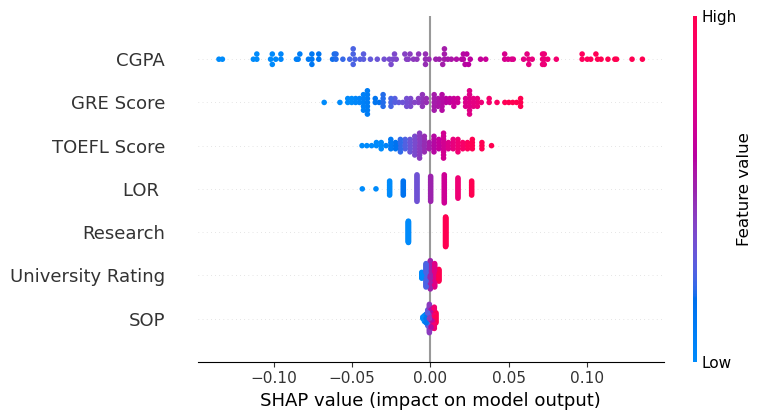

In [208]:
#SHAP (Shapley Additive Explanations)
import shap

# Create explainer and shap values
explainer = shap.Explainer(ridge_best, X_train)
shap_values = explainer(X_test)

# Summary plot (shows overall feature impact)
shap.summary_plot(shap_values, X_test)

**NOTE** *Why i am using Rideg Regression*

inputs = [
    [330, 115, 4, 4, 4, 9.2, 1],
    [310, 100, 3, 3.5, 3, 8.0, 0],
    [295, 105, 2, 3.5, 2.5, 7.5, 0],
    [350, 125, 6, 6, 6, 10, 2]
]


***1. Others model Prediction Values***

* Ridge model predict = 
    *  0.87217872
    *  0.59956868
    *  0.51097033
    *  1.10890379
* Polynomial model predict =
    * 0.86943897
    * 0.5981027
    * 0.49343139
    * 0.88616508
* Elasticnet Regression predict =
    * 0.85887287
    * 0.64283814
    * 0.54233889
    * 1.05597627
* Lasso Regression predict =
   * 0.724175
   * 0.724175
   * 0.724175
   * 0.724175
* Multi Regression predict =
   * 0.87220089
   * 0.5988011
   * 0.50981256
   * 1.10813779

**2. Test R2 and cross validation values**

* Ridge model predict = 
   * Intercept: -1.428401869689654
   * Train R2: 0.8210360290758688
   * Test R2: 0.8181550386871682
   * Cross Validation Score: 0.8105126529557694
* Polynomial model predict =
   * Intercept: -6.978506422642052
   * Train R2: 0.8357962945524062
   * Test R2: 0.8265115552644803
   * Cross Validation Score: 0.7818863884542566
* Elasticnet Regression predict =
   * Intercept: -2.2040201110650455
   * Train R2: 0.6989099924347176
   * Test R2: 0.6372364691673537
   * Cross Validation Score: 0.6700370822606456
* Lasso Regression predict =
   * Intercept: 0.7241749999999999
   * Train R2: 0.0
   * Test R2 -0.00724844132029312
   * Cross Validation Score: -0.07495355915968034
* Multi Regression predict =
   * Intercept -1.4214470719016479
   * Train R2: 0.8210671369321554
   * Test R2: 0.818843256782963
   * Cross Validation Score: 0.8108015220863887

In [ ]:
tune sahi bola tha nahane ke baad ser dukhega abhi aisa lag raha hai ser p koi baitha hai ha or meko ab vaps jaan ahonga mera pet gya projrct lga k chala ja laga hi 